# Building your Deep Neural Network: Step by Step

Previously you trained a 2-layer Neural Network with a single hidden layer. This week, you will build a deep neural network with as many layers as you want!

- In this notebook, you'll implement all the functions required to build a deep neural network.
- For the next assignment, you'll use these functions to build a deep neural network for image classification.

**By the end of this assignment, you'll be able to:**

- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer.
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example.
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

Let's get started!


## Table of Contents
- [1 - Packages](#1)
- [2 - Outline](#2)
- [3 - Initialization](#3)
    - [3.1 - 2-layer Neural Network](#3-1)
        - [Exercise 1 - initialize_parameters](#ex-1)
    - [3.2 - L-layer Neural Network](#3-2)
        - [Exercise 2 - initialize_parameters_deep](#ex-2)
- [4 - Forward Propagation Module](#4)
    - [4.1 - Linear Forward](#4-1)
        - [Exercise 3 - linear_forward](#ex-3)
    - [4.2 - Linear-Activation Forward](#4-2)
        - [Exercise 4 - linear_activation_forward](#ex-4)
    - [4.3 - L-Layer Model](#4-3)
        - [Exercise 5 - L_model_forward](#ex-5)
- [5 - Cost Function](#5)
    - [Exercise 6 - compute_cost](#ex-6)
- [6 - Backward Propagation Module](#6)
    - [6.1 - Linear Backward](#6-1)
        - [Exercise 7 - linear_backward](#ex-7)
    - [6.2 - Linear-Activation Backward](#6-2)
        - [Exercise 8 - linear_activation_backward](#ex-8)
    - [6.3 - L-Model Backward](#6-3)
        - [Exercise 9 - L_model_backward](#ex-9)
    - [6.4 - Update Parameters](#6-4)
        - [Exercise 10 - update_parameters](#ex-10)

<a name='1'></a>
## 1 - Packages

First, import all the packages you'll need during this assignment.

- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- dnn_utils provides some necessary functions for this notebook.
- testCases provides some test cases to assess the correctness of your functions
- np.random.seed(1) is used to keep all the random function calls consistent. It helps grade your work. Please don't change the seed!

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#from testCases import *
#from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
#from public_tests import *
from IPython.display import Image

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [ ]:
#testCases
import numpy as np

def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)

    return A, W, b

def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

def L_model_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    parameters = {'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ]]),
 'W2': np.array([[ 1.74481176, -0.7612069 ]]),
 'b1': np.array([[ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}
    """
    np.random.seed(1)
    X = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return X, parameters

def compute_cost_test_case():
    Y = np.asarray([[1, 1, 0]])
    aL = np.array([[.8,.9,0.4]])

    return Y, aL

def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(3,4)
    A = np.random.randn(5,4)
    W = np.random.randn(3,5)
    b = np.random.randn(3,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)

    return dA, linear_activation_cache

def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return parameters, grads


def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return X, parameters

def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA1"]))


In [ ]:
#dnn_utils

import numpy as np

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ


In [ ]:
#test_utils

import numpy as np

def datatype_check(expected_output, target_output, error):
    success = 0
    if isinstance(target_output, dict):
        for key in expected_output.keys():
            try:
                success += datatype_check(expected_output[key],
                                         target_output[key], error)
            except:
                print("Error: {} in variable {}. Got {} but expected type {}".format(error,
                                                                          key, type(target_output[key]), type(expected_output[key])))
        if success == len(target_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(target_output, tuple) or isinstance(target_output, list):
        for i in range(len(expected_output)):
            try:
                success += datatype_check(expected_output[i],
                                         target_output[i], error)
            except:
                print("Error: {} in variable {}. Got type: {}  but expected type {}".format(error,
                                                                          i, type(target_output[i]), type(expected_output[i])))
        if success == len(target_output):
            return 1
        else:
            return 0

    else:
        assert isinstance(target_output, type(expected_output))
        return 1

def equation_output_check(expected_output, target_output, error):
    success = 0
    if isinstance(expected_output, dict):
        for key in expected_output.keys():
            try:
                success += equation_output_check(expected_output[key],
                                         target_output[key], error)
            except:
                print("Error: {} for variable {}.".format(error,
                                                                          key))
        if success == len(target_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(expected_output, tuple) or isinstance(expected_output, list):
        for i in range(len(expected_output)):
            try:
                success += equation_output_check(expected_output[i],
                                         target_output[i], error)
            except:
                print("Error: {} for variable {}.".format(error, i))
        if success == len(target_output):
            return 1
        else:
            return 0

    else:
        if hasattr(expected_output, 'shape'):
            #np.allclose(target_output, expected_output)
            np.testing.assert_array_almost_equal(target_output, expected_output)
        else:
            assert target_output == expected_output
        return 1

def shape_check(expected_output, target_output, error):
    success = 0
    if isinstance(expected_output, dict):
        for key in expected_output.keys():
            try:
                success += shape_check(expected_output[key],
                                         target_output[key], error)
            except:
                print("Error: {} for variable {}.".format(error, key))
        if success == len(expected_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(expected_output, tuple) or isinstance(expected_output, list):
        for i in range(len(expected_output)):
            try:
                success += shape_check(expected_output[i],
                                         target_output[i], error)
            except:
                print("Error: {} for variable {}.".format(error, i))
        if success == len(expected_output):
            return 1
        else:
            return 0

    else:
        if hasattr(expected_output, 'shape'):
            assert target_output.shape == expected_output.shape
        return 1

def single_test(test_cases, target):
    success = 0
    for test_case in test_cases:
        try:
            if test_case['name'] == "datatype_check":
                assert isinstance(target(*test_case['input']),
                                  type(test_case["expected"]))
                success += 1
            if test_case['name'] == "equation_output_check":
                assert np.allclose(test_case["expected"],
                                   target(*test_case['input']))
                success += 1
            if test_case['name'] == "shape_check":
                assert test_case['expected'].shape == target(*test_case['input']).shape
                success += 1
        except:
            print("Error: " + test_case['error'])

    if success == len(test_cases):
        print("\033[92m All tests passed.")
    else:
        print('\033[92m', success," Tests passed")
        print('\033[91m', len(test_cases) - success, " Tests failed")
        raise AssertionError("Not all tests were passed for {}. Check your equations and avoid using global variables inside the function.".format(target.__name__))

def multiple_test(test_cases, target):
    success = 0
    for test_case in test_cases:
        try:
            target_answer = target(*test_case['input'])
            if test_case['name'] == "datatype_check":
                success += datatype_check(test_case['expected'], target_answer, test_case['error'])
            if test_case['name'] == "equation_output_check":
                success += equation_output_check(test_case['expected'], target_answer, test_case['error'])
            if test_case['name'] == "shape_check":
                success += shape_check(test_case['expected'], target_answer, test_case['error'])
        except:
            print("Error: " + test_case['error'])

    if success == len(test_cases):
        print("\033[92m All tests passed.")
    else:
        print('\033[92m', success," Tests passed")
        print('\033[91m', len(test_cases) - success, " Tests failed")
        raise AssertionError("Not all tests were passed for {}. Check your equations and avoid using global variables inside the function.".format(target.__name__))


In [ ]:
#public_tests

import numpy as np


def initialize_parameters_test(target):
    n_x, n_h, n_y = 3, 2, 1
    expected_W1 = np.array([[ 0.01624345, -0.00611756, -0.00528172],
                     [-0.01072969,  0.00865408, -0.02301539]])
    expected_b1 = np.array([[0.],
                            [0.]])
    expected_W2 = np.array([[ 0.01744812, -0.00761207]])
    expected_b2 = np.array([[0.]])
    expected_output = {"W1": expected_W1,
                  "b1": expected_b1,
                  "W2": expected_W2,
                  "b2": expected_b2}
    test_cases = [
        {
            "name":"datatype_check",
            "input": [n_x, n_h, n_y],
            "expected": expected_output,
            "error":"Datatype mismatch."
        },
        {
            "name": "equation_output_check",
            "input": [n_x, n_h, n_y],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]

    multiple_test(test_cases, target)



def initialize_parameters_deep_test(target):
    layer_dims = [5,4,3]
    expected_W1 = np.array([[ 0.01788628,  0.0043651 ,  0.00096497, -0.01863493, -0.00277388],
                        [-0.00354759, -0.00082741, -0.00627001, -0.00043818, -0.00477218],
                        [-0.01313865,  0.00884622,  0.00881318,  0.01709573,  0.00050034],
                        [-0.00404677, -0.0054536 , -0.01546477,  0.00982367, -0.01101068]])
    expected_b1 = np.array([[0.],
                            [0.],
                            [0.],
                            [0.]])
    expected_W2 = np.array([[-0.01185047, -0.0020565 ,  0.01486148,  0.00236716],
                         [-0.01023785, -0.00712993,  0.00625245, -0.00160513],
                         [-0.00768836, -0.00230031,  0.00745056,  0.01976111]])
    expected_b2 = np.array([[0.],
                            [0.],
                        [0.]])
    expected_output = {"W1": expected_W1,
                  "b1": expected_b1,
                  "W2": expected_W2,
                  "b2": expected_b2}
    test_cases = [
        {
            "name":"datatype_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error":"Datatype mismatch"
        },
        {
            "name": "shape_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [layer_dims],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]

    multiple_test(test_cases, target)

def linear_forward_test(target):
    np.random.seed(1)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    expected_cache = (A_prev, W, b)
    expected_Z = np.array([[ 3.26295337, -1.23429987]])
    expected_output = (expected_Z, expected_cache)
    test_cases = [
        {
            "name":"datatype_check",
            "input": [A_prev, W, b],
            "expected": expected_output,
            "error":"Datatype mismatch"
        },
        {
            "name": "shape_check",
            "input": [A_prev, W, b],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [A_prev, W, b],
            "expected": expected_output,
            "error": "Wrong output"
        },

    ]

    multiple_test(test_cases, target)

def linear_activation_forward_test(target):
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    expected_linear_cache = (A_prev, W, b)
    expected_Z = np.array([[ 3.43896131, -2.08938436]])
    expected_cache = (expected_linear_cache, expected_Z)
    expected_A_sigmoid = np.array([[0.96890023, 0.11013289]])
    expected_A_relu = np.array([[3.43896131, 0.]])

    expected_output_sigmoid = (expected_A_sigmoid, expected_cache)
    expected_output_relu = (expected_A_relu, expected_cache)
    test_cases = [
        {
            "name":"datatype_check",
            "input": [A_prev, W, b, 'sigmoid'],
            "expected": expected_output_sigmoid,
            "error":"Datatype mismatch with sigmoid activation"
        },
        {
            "name": "shape_check",
            "input": [A_prev, W, b, 'sigmoid'],
            "expected": expected_output_sigmoid,
            "error": "Wrong shape with sigmoid activation"
        },
        {
            "name": "equation_output_check",
            "input": [A_prev, W, b, 'sigmoid'],
            "expected": expected_output_sigmoid,
            "error": "Wrong output with sigmoid activation"
        },
        {
            "name":"datatype_check",
            "input": [A_prev, W, b, 'relu'],
            "expected": expected_output_relu,
            "error":"Datatype mismatch with relu activation"
        },
        {
            "name": "shape_check",
            "input": [A_prev, W, b, 'relu'],
            "expected": expected_output_relu,
            "error": "Wrong shape with relu activation"
        },
        {
            "name": "equation_output_check",
            "input": [A_prev, W, b, 'relu'],
            "expected": expected_output_relu,
            "error": "Wrong output with relu activation"
        }
    ]

    multiple_test(test_cases, target)

def L_model_forward_test(target):
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    expected_cache = [((np.array([[-0.31178367,  0.72900392,  0.21782079, -0.8990918 ],
          [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
          [ 1.63929108, -0.4298936 ,  2.63128056,  0.60182225],
          [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
          [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]]),
   np.array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
          [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
          [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
          [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]),
   np.array([[ 1.38503523],
          [-0.51962709],
          [-0.78015214],
          [ 0.95560959]])),
  np.array([[-5.23825714,  3.18040136,  0.4074501 , -1.88612721],
         [-2.77358234, -0.56177316,  3.18141623, -0.99209432],
         [ 4.18500916, -1.78006909, -0.14502619,  2.72141638],
         [ 5.05850802, -1.25674082, -3.54566654,  3.82321852]])),
 ((np.array([[0.        , 3.18040136, 0.4074501 , 0.        ],
          [0.        , 0.        , 3.18141623, 0.        ],
          [4.18500916, 0.        , 0.        , 2.72141638],
          [5.05850802, 0.        , 0.        , 3.82321852]]),
   np.array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
          [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
          [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]),
   np.array([[ 1.50278553],
          [-0.59545972],
          [ 0.52834106]])),
  np.array([[ 2.2644603 ,  1.09971298, -2.90298027,  1.54036335],
         [ 6.33722569, -2.38116246, -4.11228806,  4.48582383],
         [10.37508342, -0.66591468,  1.63635185,  8.17870169]])),
 ((np.array([[ 2.2644603 ,  1.09971298,  0.        ,  1.54036335],
          [ 6.33722569,  0.        ,  0.        ,  4.48582383],
          [10.37508342,  0.        ,  1.63635185,  8.17870169]]),
   np.array([[ 0.9398248 ,  0.42628539, -0.75815703]]),
   np.array([[-0.16236698]])),
  np.array([[-3.19864676,  0.87117055, -1.40297864, -3.00319435]]))]
    expected_AL = np.array([[0.03921668, 0.70498921, 0.19734387, 0.04728177]])
    expected_output = (expected_AL, expected_cache)
    test_cases = [
        {
            "name":"datatype_check",
            "input": [X, parameters],
            "expected": expected_output,
            "error":"The function should return a numpy array."
        },
        {
            "name": "shape_check",
            "input": [X, parameters],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [X, parameters],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]

    multiple_test(test_cases, target)
'''        {
            "name":"datatype_check",
            "input": [AL, Y],
            "expected": expected_output,
            "error":"Data type mismatch"
        },
        {
            "name": "shape_check",
            "input": [AL, Y],
            "expected": expected_output,
            "error": "Wrong shape"
 },'''

def compute_cost_test(target):
    Y = np.asarray([[1, 1, 0]])
    AL = np.array([[.8,.9,0.4]])
    expected_output = np.array(0.27977656)

    test_cases = [
        {
            "name": "equation_output_check",
            "input": [AL, Y],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]

    single_test(test_cases, target)

def linear_backward_test(target):
    np.random.seed(1)
    dZ = np.random.randn(3,4)
    A = np.random.randn(5,4)
    W = np.random.randn(3,5)
    b = np.random.randn(3,1)
    linear_cache = (A, W, b)
    expected_dA_prev = np.array([[-1.15171336,  0.06718465, -0.3204696 ,  2.09812712],
       [ 0.60345879, -3.72508701,  5.81700741, -3.84326836],
       [-0.4319552 , -1.30987417,  1.72354705,  0.05070578],
       [-0.38981415,  0.60811244, -1.25938424,  1.47191593],
       [-2.52214926,  2.67882552, -0.67947465,  1.48119548]])
    expected_dW = np.array([[ 0.07313866, -0.0976715 , -0.87585828,  0.73763362,  0.00785716],
           [ 0.85508818,  0.37530413, -0.59912655,  0.71278189, -0.58931808],
           [ 0.97913304, -0.24376494, -0.08839671,  0.55151192, -0.10290907]])
    expected_db = np.array([[-0.14713786],
           [-0.11313155],
           [-0.13209101]])
    expected_output = (expected_dA_prev, expected_dW, expected_db)
    test_cases = [
        {
            "name":"datatype_check",
            "input": [dZ, linear_cache],
            "expected": expected_output,
            "error":"Data type mismatch"
        },
        {
            "name": "shape_check",
            "input": [dZ, linear_cache],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [dZ, linear_cache],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]

    multiple_test(test_cases, target)

def linear_activation_backward_test(target):
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)

    expected_dA_prev_sigmoid = np.array([[ 0.11017994,  0.01105339],
                             [ 0.09466817,  0.00949723],
                             [-0.05743092, -0.00576154]])
    expected_dW_sigmoid = np.array([[ 0.10266786,  0.09778551, -0.01968084]])
    expected_db_sigmoid = np.array([[-0.05729622]])
    expected_output_sigmoid = (expected_dA_prev_sigmoid,
                               expected_dW_sigmoid,
                               expected_db_sigmoid)

    expected_dA_prev_relu = np.array([[ 0.44090989,  0.        ],
           [ 0.37883606,  0.        ],
           [-0.2298228 ,  0.        ]])
    expected_dW_relu = np.array([[ 0.44513824,  0.37371418, -0.10478989]])
    expected_db_relu = np.array([[-0.20837892]])
    expected_output_relu = (expected_dA_prev_relu,
                           expected_dW_relu,
                           expected_db_relu)

    test_cases = [
        {
            "name":"datatype_check",
            "input": [dA, linear_activation_cache, 'sigmoid'],
            "expected": expected_output_sigmoid,
            "error":"Data type mismatch with sigmoid activation"
        },
        {
            "name": "shape_check",
            "input": [dA, linear_activation_cache, 'sigmoid'],
            "expected": expected_output_sigmoid,
            "error": "Wrong shape with sigmoid activation"
        },
        {
            "name": "equation_output_check",
            "input": [dA, linear_activation_cache, 'sigmoid'],
            "expected": expected_output_sigmoid,
            "error": "Wrong output with sigmoid activation"
        } ,
        {
            "name":"datatype_check",
            "input": [dA, linear_activation_cache, 'relu'],
            "expected": expected_output_relu,
            "error":"Data type mismatch with relu activation"
        },
        {
            "name": "shape_check",
            "input": [dA, linear_activation_cache, 'relu'],
            "expected": expected_output_relu,
            "error": "Wrong shape with relu activation"
        },
        {
            "name": "equation_output_check",
            "input": [dA, linear_activation_cache, 'relu'],
            "expected": expected_output_relu,
            "error": "Wrong output with relu activation"
        }
    ]

    multiple_test(test_cases, target)

def L_model_backward_test(target):
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    expected_dA1 = np.array([[ 0.12913162, -0.44014127],
            [-0.14175655,  0.48317296],
            [ 0.01663708, -0.05670698]])
    expected_dW2 = np.array([[-0.39202432, -0.13325855, -0.04601089]])
    expected_db2 = np.array([[0.15187861]])
    expected_dA0 = np.array([[ 0.        ,  0.52257901],
            [ 0.        , -0.3269206 ],
            [ 0.        , -0.32070404],
            [ 0.        , -0.74079187]])
    expected_dW1 = np.array([[0.41010002, 0.07807203, 0.13798444, 0.10502167],
            [0.        , 0.        , 0.        , 0.        ],
            [0.05283652, 0.01005865, 0.01777766, 0.0135308 ]])
    expected_db1 = np.array([[-0.22007063],
            [ 0.        ],
            [-0.02835349]])
    expected_output = {'dA1': expected_dA1,
                       'dW2': expected_dW2,
                       'db2': expected_db2,
                       'dA0': expected_dA0,
                       'dW1': expected_dW1,
                       'db1': expected_db1
                      }
    test_cases = [
        {
            "name":"datatype_check",
            "input": [AL, Y, caches],
            "expected": expected_output,
            "error":"Data type mismatch"
        },
        {
            "name": "shape_check",
            "input": [AL, Y, caches],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [AL, Y, caches],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]

    multiple_test(test_cases, target)

def update_parameters_test(target):
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    learning_rate = 0.1
    expected_W1 = np.array([[-0.59562069, -0.09991781, -2.14584584,  1.82662008],
        [-1.76569676, -0.80627147,  0.51115557, -1.18258802],
        [-1.0535704 , -0.86128581,  0.68284052,  2.20374577]])
    expected_b1 = np.array([[-0.04659241],
            [-1.28888275],
            [ 0.53405496]])
    expected_W2 = np.array([[-0.55569196,  0.0354055 ,  1.32964895]])
    expected_b2 = np.array([[-0.84610769]])
    expected_output = {"W1": expected_W1,
                       'b1': expected_b1,
                       'W2': expected_W2,
                       'b2': expected_b2
                      }


    test_cases = [
        {
            "name":"datatype_check",
            "input": [parameters, grads, learning_rate],
            "expected": expected_output,
            "error":"Data type mismatch"
        },
        {
            "name": "shape_check",
            "input": [parameters, grads, learning_rate],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [parameters, grads, 0.1],
            "expected": expected_output,
            "error": "Wrong output"
        }

    ]
    #print(target(*test_cases[2]["input"]))
    multiple_test(test_cases, target)





<a name='2'></a>
## 2 - Outline

To build your neural network, you'll be implementing several "helper functions." These helper functions will be used in the next assignment to build a two-layer neural network and an L-layer neural network.

Each small helper function will have detailed instructions to walk you through the necessary steps. Here's an outline of the steps in this assignment:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network
- Implement the forward propagation module (shown in purple in the figure below)
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - The ACTIVATION function is provided for you (relu/sigmoid)
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss
- Implement the backward propagation module (denoted in red in the figure below)
    - Complete the LINEAR part of a layer's backward propagation step
    - The gradient of the ACTIVATE function is provided for you(relu_backward/sigmoid_backward)
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally, update the parameters


**Note**:

For every forward function, there is a corresponding backward function. This is why at every step of your forward module you will be storing some values in a cache. These cached values are useful for computing gradients.

In the backpropagation module, you can then use the cache to calculate the gradients. Don't worry, this assignment will show you exactly how to carry out each of these steps!

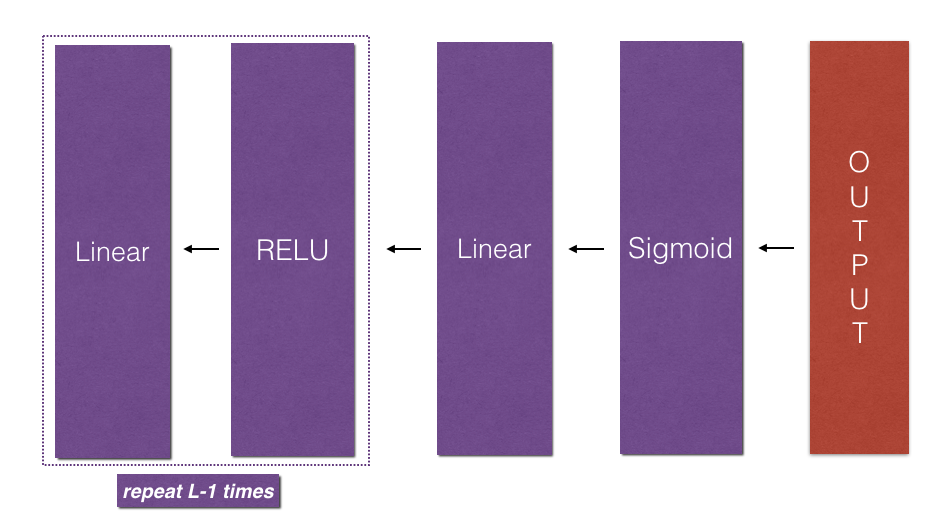

In [ ]:
Image('final outline.png', width=800, height=500)

<a name='3'></a>
## 3 - Initialization

You will write two helper functions to initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one generalizes this initialization process to $L$ layers.

<a name='3-1'></a>
### 3.1 - 2-layer Neural Network

<a name='ex-1'></a>
### Exercise 1 - initialize_parameters

Create and initialize the parameters of the 2-layer neural network.

**Instructions**:

- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*.
- Use this random initialization for the weight matrices: `np.random.randn(shape)*0.01` with the correct shape
- Use zero initialization for the biases: `np.zeros(shape)`

In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(1)

    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters = initialize_parameters(3,2,1)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_test(initialize_parameters)

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]
 All tests passed.


***Expected output***
```
W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]
```

<a name='3-2'></a>
### 3.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep` function, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. For example, if the size of your input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">
    <tr>
        <td>  </td>
        <td> <b>Shape of W</b> </td>
        <td> <b>Shape of b</b>  </td>
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td>
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td>
        <td> $(n^{[1]},12288)$ </td>
        <td> $(n^{[1]},1)$ </td>
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td>
        <td> $(n^{[1]},209)$ </td>
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td>
        <td> $(n^{[2]}, n^{[1]})$  </td>
        <td> $(n^{[2]},1)$ </td>
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td>
        <td> $(n^{[2]}, 209)$ </td>
    <tr>
       <tr>
        <td> $\vdots$ </td>
        <td> $\vdots$  </td>
        <td> $\vdots$  </td>
        <td> $\vdots$</td>
        <td> $\vdots$  </td>
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td>
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td>
        <td> $(n^{[L-1]}, 1)$  </td>
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td>
        <td> $(n^{[L-1]}, 209)$ </td>
   <tr>
   <tr>
       <td> <b>Layer L</b> </td>
        <td> $(n^{[L]}, n^{[L-1]})$ </td>
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td>
    <tr>
</table>

Remember that when you compute $W X + b$ in python, it carries out broadcasting. For example, if:

$$ W = \begin{bmatrix}
    w_{00}  & w_{01} & w_{02} \\
    w_{10}  & w_{11} & w_{12} \\
    w_{20}  & w_{21} & w_{22}
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    x_{00}  & x_{01} & x_{02} \\
    x_{10}  & x_{11} & x_{12} \\
    x_{20}  & x_{21} & x_{22}
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    b_0  \\
    b_1  \\
    b_2
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (w_{00}x_{00} + w_{01}x_{10} + w_{02}x_{20}) + b_0 & (w_{00}x_{01} + w_{01}x_{11} + w_{02}x_{21}) + b_0 & \cdots \\
    (w_{10}x_{00} + w_{11}x_{10} + w_{12}x_{20}) + b_1 & (w_{10}x_{01} + w_{11}x_{11} + w_{12}x_{21}) + b_1 & \cdots \\
    (w_{20}x_{00} + w_{21}x_{10} + w_{22}x_{20}) + b_2 &  (w_{20}x_{01} + w_{21}x_{11} + w_{22}x_{21}) + b_2 & \cdots
\end{bmatrix}\tag{3}  $$


<a name='ex-2'></a>
### Exercise 2 -  initialize_parameters_deep

Implement initialization for an L-layer Neural Network.

**Instructions**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- You'll store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for last week's Planar Data classification model would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers!
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [ ]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = ...
        # parameters['b' + str(l)] = ...
        # YOUR CODE STARTS HERE

        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        # YOUR CODE ENDS HERE

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

In [ ]:
parameters = initialize_parameters_deep([5,4,3])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_deep_test(initialize_parameters_deep)

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]
 All tests passed.


***Expected output***
```
W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]
```

<a name='4'></a>
## 4 - Forward Propagation Module

<a name='4-1'></a>
### 4.1 - Linear Forward

Now that you have initialized your parameters, you can do the forward propagation module. Start by implementing some basic functions that you can use again later when implementing the model. Now, you'll complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$.

<a name='ex-3'></a>
### Exercise 3 - linear_forward

Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

In [ ]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    #(≈ 1 line of code)
    # Z = ...
    # YOUR CODE STARTS HERE

    Z = np.dot(W, A) + b

    # YOUR CODE ENDS HERE
    cache = (A, W, b)

    return Z, cache

In [ ]:
t_A, t_W, t_b = linear_forward_test_case()
t_Z, t_linear_cache = linear_forward(t_A, t_W, t_b)
print("Z = " + str(t_Z))

linear_forward_test(linear_forward)

Z = [[ 3.26295337 -1.23429987]]
 All tests passed.


***Expected output***
```
Z = [[ 3.26295337 -1.23429987]]
```

<a name='4-2'></a>
### 4.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. You've been provided with the `sigmoid` function which returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. You've been provided with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what you'll feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

For added convenience, you're going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you'll implement a function that does the LINEAR forward step, followed by an ACTIVATION forward step.

<a name='ex-4'></a>
### Exercise 4 - linear_activation_forward

Implement the forward propagation of the *LINEAR->ACTIVATION* layer. Mathematical relation is: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu(). Use `linear_forward()` and the correct activation function.

In [ ]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

        # YOUR CODE ENDS HERE

    elif activation == "relu":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

        # YOUR CODE ENDS HERE
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
t_A_prev, t_W, t_b = linear_activation_forward_test_case()

t_A, t_linear_activation_cache = linear_activation_forward(t_A_prev, t_W, t_b, activation = "sigmoid")
print("With sigmoid: A = " + str(t_A))

t_A, t_linear_activation_cache = linear_activation_forward(t_A_prev, t_W, t_b, activation = "relu")
print("With ReLU: A = " + str(t_A))

linear_activation_forward_test(linear_activation_forward)

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]
 All tests passed.


***Expected output***
```
With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]
```

**Note**: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers.

<a name='4-3'></a>
### 4.3 - L-Layer Model

For even *more* convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.


<a name='ex-5'></a>
### Exercise 5 -  L_model_forward

Implement the forward propagation of the above model.

**Instructions**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.)

**Hints**:
- Use the functions you've previously written
- Use a for loop to replicate [LINEAR->RELU] (L-1) times
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

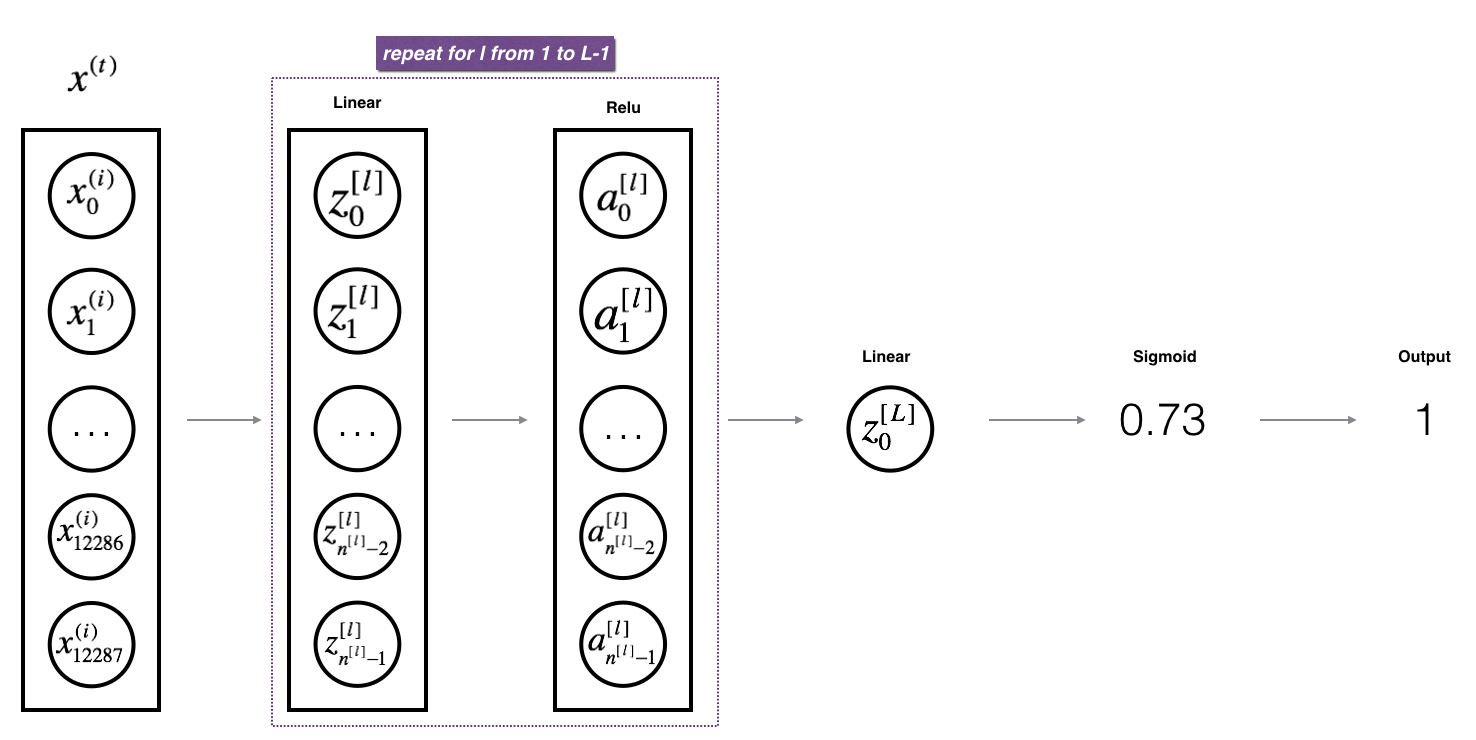

In [ ]:
Image('model_architecture_kiank.png', width=600, height=300)

In [ ]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A
        #(≈ 2 lines of code)
        # A, cache = ...
        # caches ...
        # YOUR CODE STARTS HERE

        A, cache = linear_activation_forward(A, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

        # YOUR CODE ENDS HERE

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    #(≈ 2 lines of code)
    # AL, cache = ...
    # caches ...
    # YOUR CODE STARTS HERE

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)

    # YOUR CODE ENDS HERE

    return AL, caches

In [ ]:
t_X, t_parameters = L_model_forward_test_case_2hidden()
t_AL, t_caches = L_model_forward(t_X, t_parameters)

print("AL = " + str(t_AL))

L_model_forward_test(L_model_forward)

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
 All tests passed.


***Expected output***
```
AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
```

**Awesome!** You've implemented a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

<a name='5'></a>
## 5 - Cost Function

Now you can implement forward and backward propagation! You need to compute the cost, in order to check whether your model is actually learning.

<a name='ex-6'></a>
### Exercise 6 - compute_cost
Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [ ]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    # (≈ 1 lines of code)
    # cost = ...
    # YOUR CODE STARTS HERE

    cost = np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1 - Y), np.log(1 - AL))) * (-1/m)

    # YOUR CODE ENDS HERE

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).


    return cost

In [ ]:
t_Y, t_AL = compute_cost_test_case()
t_cost = compute_cost(t_AL, t_Y)

print("Cost: " + str(t_cost))

compute_cost_test(compute_cost)

Cost: 0.2797765635793422
 All tests passed.


**Expected Output**:

<table>
    <tr>
        <td><b>cost</b> </td>
    <td> 0.2797765635793422</td>
    </tr>
</table>

<a name='6'></a>
## 6 - Backward Propagation Module

Just as you did for the forward propagation, you'll implement helper functions for backpropagation. Remember that backpropagation is used to calculate the gradient of the loss function with respect to the parameters.


Now, similarly to forward propagation, you're going to build the backward propagation in three steps:
1. LINEAR backward
2. LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
3. [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

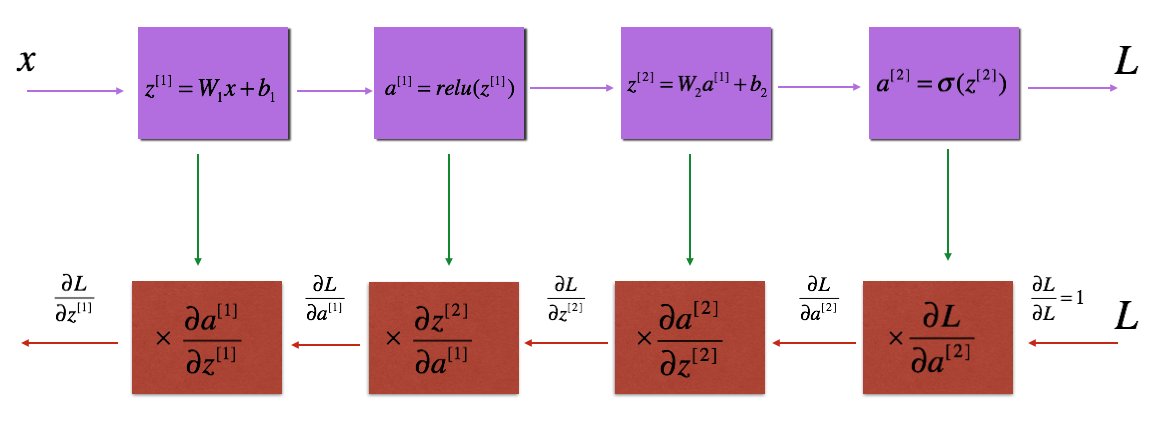

In [ ]:
Image('backprop_kiank.png', width=650, height=250)

For the next exercise, you will need to remember that:

- `b` is a matrix(np.ndarray) with 1 column and n rows, i.e: b = [[1.0], [2.0]] (remember that `b` is a constant)
- np.sum performs a sum over the elements of a ndarray
- axis=1 or axis=0 specify if the sum is carried out by rows or by columns respectively
- keepdims specifies if the original dimensions of the matrix must be kept.
- Look at the following example to clarify:

In [ ]:
A = np.array([[1, 2], [3, 4]])

print('axis=1 and keepdims=True')
print(np.sum(A, axis=1, keepdims=True))
print('axis=1 and keepdims=False')
print(np.sum(A, axis=1, keepdims=False))
print('axis=0 and keepdims=True')
print(np.sum(A, axis=0, keepdims=True))
print('axis=0 and keepdims=False')
print(np.sum(A, axis=0, keepdims=False))

<a name='6-1'></a>
### 6.1 - Linear Backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.


The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$.

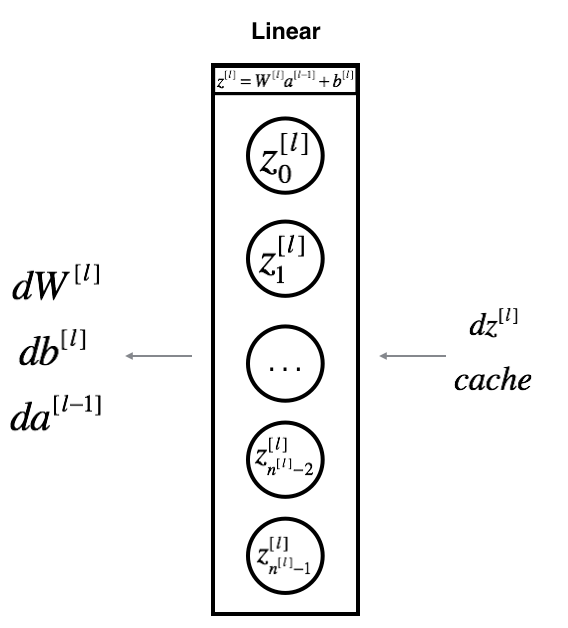

In [ ]:
Image('linearback_kiank.png', width=250, height=300)

<a name='ex-7'></a>
### Exercise 7 - linear_backward

Use the 3 formulas above to implement `linear_backward()`.

**Hint**:

- In numpy you can get the transpose of an ndarray `A` using `A.T` or `A.transpose()`

In [ ]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    # dW = ...
    # db = ... sum by the rows of dZ with keepdims=True
    # dA_prev = ...
    # YOUR CODE STARTS HERE

    dW = np.dot(dZ, A_prev.T) * (1/m)
    db = np.sum(dZ, axis=1, keepdims=True) * (1/m)
    dA_prev = np.dot(W.T, dZ)

    # YOUR CODE ENDS HERE

    return dA_prev, dW, db

In [ ]:
t_dZ, t_linear_cache = linear_backward_test_case()
t_dA_prev, t_dW, t_db = linear_backward(t_dZ, t_linear_cache)

print("dA_prev: " + str(t_dA_prev))
print("dW: " + str(t_dW))
print("db: " + str(t_db))

linear_backward_test(linear_backward)

dA_prev: [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW: [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db: [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
 All tests passed.


**Expected Output**:
```
dA_prev: [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW: [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db: [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
 ```

<a name='6-2'></a>
### 6.2 - Linear-Activation Backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**.

To help you implement `linear_activation_backward`, two backward functions have been provided:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function,
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). \tag{11}$$  

<a name='ex-8'></a>
### Exercise 8 -  linear_activation_backward

Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [ ]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE

        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        # YOUR CODE ENDS HERE

    elif activation == "sigmoid":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE

        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db =linear_backward(dZ, linear_cache)

        # YOUR CODE ENDS HERE

    return dA_prev, dW, db

In [ ]:
t_dAL, t_linear_activation_cache = linear_activation_backward_test_case()

t_dA_prev, t_dW, t_db = linear_activation_backward(t_dAL, t_linear_activation_cache, activation = "sigmoid")
print("With sigmoid: dA_prev = " + str(t_dA_prev))
print("With sigmoid: dW = " + str(t_dW))
print("With sigmoid: db = " + str(t_db))

t_dA_prev, t_dW, t_db = linear_activation_backward(t_dAL, t_linear_activation_cache, activation = "relu")
print("With relu: dA_prev = " + str(t_dA_prev))
print("With relu: dW = " + str(t_dW))
print("With relu: db = " + str(t_db))

linear_activation_backward_test(linear_activation_backward)

With sigmoid: dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
With sigmoid: dW = [[ 0.10266786  0.09778551 -0.01968084]]
With sigmoid: db = [[-0.05729622]]
With relu: dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
With relu: dW = [[ 0.44513824  0.37371418 -0.10478989]]
With relu: db = [[-0.20837892]]
 All tests passed.


**Expected output:**

```
With sigmoid: dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
With sigmoid: dW = [[ 0.10266786  0.09778551 -0.01968084]]
With sigmoid: db = [[-0.05729622]]
With relu: dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
With relu: dW = [[ 0.44513824  0.37371418 -0.10478989]]
With relu: db = [[-0.20837892]]
```

<a name='6-3'></a>
### 6.3 - L-Model Backward

Now you will implement the backward function for the whole network!

Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you'll use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you'll iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass.




**Initializing backpropagation**:

To backpropagate through this network, you know that the output is:
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which, again, you don't need in-depth knowledge of!):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function).

After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula :

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

<a name='ex-9'></a>
### Exercise 9 -  L_model_backward

Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

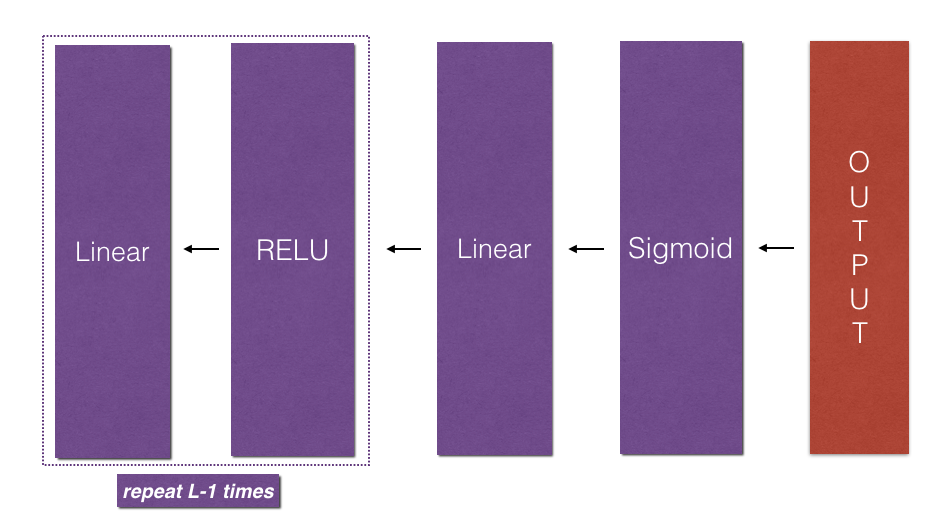

In [ ]:
Image('mn_backward.png', width=450, height=300)

In [ ]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    #(1 line of code)
    # dAL = ...
    # YOUR CODE STARTS HERE

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # YOUR CODE ENDS HERE

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    #(approx. 5 lines)
    # current_cache = ...
    # dA_prev_temp, dW_temp, db_temp = ...
    # grads["dA" + str(L-1)] = ...
    # grads["dW" + str(L)] = ...
    # grads["db" + str(L)] = ...
    # YOUR CODE STARTS HERE

    current_cache = caches[-1]
    dA_prev_temp, dW_temp, db_temp = linear_backward(sigmoid_backward(dAL, current_cache[1]), current_cache[0])
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    # YOUR CODE ENDS HERE

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        #(approx. 5 lines)
        # current_cache = ...
        # dA_prev_temp, dW_temp, db_temp = ...
        # grads["dA" + str(l)] = ...
        # grads["dW" + str(l + 1)] = ...
        # grads["db" + str(l + 1)] = ...
        # YOUR CODE STARTS HERE

        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_backward(relu_backward(grads["dA" + str(l+1)], current_cache[1]), current_cache[0])
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

        # YOUR CODE ENDS HERE

    return grads

In [ ]:
t_AL, t_Y_assess, t_caches = L_model_backward_test_case()
grads = L_model_backward(t_AL, t_Y_assess, t_caches)

print("dA0 = " + str(grads['dA0']))
print("dA1 = " + str(grads['dA1']))
print("dW1 = " + str(grads['dW1']))
print("dW2 = " + str(grads['dW2']))
print("db1 = " + str(grads['db1']))
print("db2 = " + str(grads['db2']))

L_model_backward_test(L_model_backward)

dA0 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
dW2 = [[-0.39202432 -0.13325855 -0.04601089]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
db2 = [[0.15187861]]
 All tests passed.


**Expected output:**

```
dA0 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
dW2 = [[-0.39202432 -0.13325855 -0.04601089]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
db2 = [[0.15187861]]
```

<a name='6-4'></a>
### 6.4 - Update Parameters

In this section, you'll update the parameters of the model, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate.

After computing the updated parameters, store them in the parameters dictionary.

<a name='ex-10'></a>
### Exercise 10 - update_parameters

Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$.

In [ ]:
# GRADED FUNCTION: update_parameters

def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    params -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    #(≈ 2 lines of code)
    for l in range(L):
        # parameters["W" + str(l+1)] = ...
        # parameters["b" + str(l+1)] = ...
        # YOUR CODE STARTS HERE

        parameters["W" + str(l+1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]

        # YOUR CODE ENDS HERE
    return parameters

In [ ]:
t_parameters, grads = update_parameters_test_case()
t_parameters = update_parameters(t_parameters, grads, 0.1)

print ("W1 = "+ str(t_parameters["W1"]))
print ("b1 = "+ str(t_parameters["b1"]))
print ("W2 = "+ str(t_parameters["W2"]))
print ("b2 = "+ str(t_parameters["b2"]))

update_parameters_test(update_parameters)

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]
 All tests passed.


**Expected output:**

```
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]
```

### Congratulations!

You've just implemented all the functions required for building a deep neural network, including:

- Using non-linear units improve your model
- Building a deeper neural network (with more than 1 hidden layer)
- Implementing an easy-to-use neural network class

This was indeed a long assignment, but the next part of the assignment is easier. ;)

In the next assignment, you'll be putting all these together to build two models:

- A two-layer neural network
- An L-layer neural network

You will in fact use these models to classify cat vs non-cat images! (Meow!) Great work and see you next time.